---------------
---------------

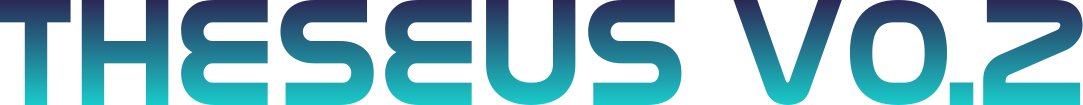

---------------
---------------

# Training on Feed Forward Neural Network (v0.1)

### PROJECT THESEUS (v0.2) - PART 4
------------------

Artash Nath, UTAT Orbit Member

-------------------

This notebook trains a very basic feed forward neural network model on the position1/position2 training database.

It then unnormalized the predictions to create a performance metrix over the different parameters

-------------------

<b>1. Importing Libraries</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import random
from tensorflow.keras.layers import*
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import Model
from keras.utils.vis_utils import plot_model

-----------------------------
<b>2. Load Training Data</b>

In [2]:
train_inputs = np.load('./DATA/ML DATA/Train_Inputs.npy')
train_outputs = np.load('./DATA/ML DATA/Train_Outputs.npy')

test_inputs = np.load('./DATA/ML DATA/Test_Inputs.npy')
test_outputs = np.load('./DATA/ML DATA/Test_Outputs.npy')

In [3]:
print("Train Inputs : {}".format(np.shape(train_inputs)))
print("Train Outputs : {}".format(np.shape(train_outputs)))
print()
print("Test Inputs : {}".format(np.shape(test_inputs)))
print("Test Outputs : {}".format(np.shape(test_outputs)))

Train Inputs : (43200000, 6)
Train Outputs : (43200000, 6)

Test Inputs : (10800000, 6)
Test Outputs : (10800000, 6)


-----------------------------
<b>3. Creating Neural Network</b>

In [4]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='relu'))
model.add(Dense(6))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


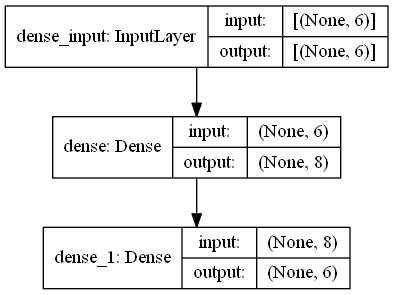

In [6]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

-----------------------------
<b>4. Training Neural Network</b>

In [7]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
history1 = model.fit(train_inputs, train_outputs, epochs=30, batch_size=5000, validation_data = (test_inputs, test_outputs))

Epoch 1/30
8640/8640 [==============================] - 22s 2ms/step - loss: 0.0207 - val_loss: 4.3550e-06
Epoch 2/30
8640/8640 [==============================] - 18s 2ms/step - loss: 4.0606e-06 - val_loss: 3.7683e-06
Epoch 3/30
8640/8640 [==============================] - 18s 2ms/step - loss: 3.5443e-06 - val_loss: 3.3832e-06
Epoch 4/30
8640/8640 [==============================] - 18s 2ms/step - loss: 3.3114e-06 - val_loss: 3.1887e-06
Epoch 5/30
8640/8640 [==============================] - 18s 2ms/step - loss: 2.6104e-06 - val_loss: 1.5681e-06
Epoch 6/30
8640/8640 [==============================] - 18s 2ms/step - loss: 1.6375e-06 - val_loss: 1.5498e-06
Epoch 7/30
8640/8640 [==============================] - 18s 2ms/step - loss: 1.6241e-06 - val_loss: 1.5353e-06
Epoch 8/30
8640/8640 [==============================] - 17s 2ms/step - loss: 1.6232e-06 - val_loss: 1.5192e-06
Epoch 9/30
8640/8640 [==============================] - 18s 2ms/step - loss: 1.6218e-06 - val_loss: 1.5448e-06
Epoch

In [8]:
model.load_weights('model1.h5')

------------
<b>5. Evaluation of Neural Network</b>

In [9]:
model.evaluate(test_inputs, test_outputs, batch_size = len(test_inputs))

1/1 [==============================] - 1s 1s/step - loss: 1.5908e-06


1.5908161685729283e-06

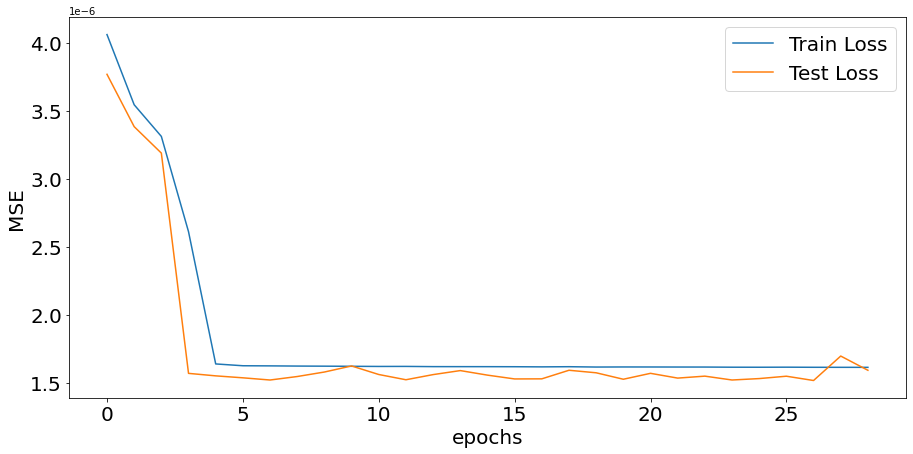

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(history1.history['loss'][1:])
plt.plot(history1.history['val_loss'][1:])
plt.xlabel('epochs', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.legend(['Train Loss', 'Test Loss'], fontsize=20)

In [12]:
position2_minimums = np.load('./DATA/NORMALIZATION/position2_maximums.npy')
position2_maximums = np.load('./DATA/NORMALIZATION/position2_minimums.npy')

def unnormalize(data):
    return (data*(position2_maximums - position2_minimums))+position2_minimums

validation_data = (test_inputs, test_outputs)
assert (len(validation_data) == 2)
assert (len(validation_data[0]) == len(validation_data[1]))
validation_inputs = validation_data[0]
validation_outputs = validation_data[1]

start = time.perf_counter()
predictions = model.predict(validation_inputs, batch_size=len(validation_inputs))
end = time.perf_counter()
pred_time = abs(end-start)*1000
time_per_sample = round(pred_time/len(validation_inputs), 5)
print("Predicted {} samples at {} ms/sample".format(len(validation_inputs), time_per_sample))


errors_all = abs(validation_outputs - predictions)
error_array = [np.mean(errors_all[:,0]), np.mean(errors_all[:,1]), np.mean(errors_all[:,2]), 
               np.mean(errors_all[:,3]), np.mean(errors_all[:,4]), np.mean(errors_all[:,5])]


errors_unormalized = abs(unnormalize(validation_outputs) - unnormalize(predictions))
errors_unormalized_array = [np.mean(errors_unormalized[:,0]), np.mean(errors_unormalized[:,1]), 
                            np.mean(errors_unormalized[:,2]), np.mean(errors_unormalized[:,3]), 
                            np.mean(errors_unormalized[:,4]), np.mean(errors_unormalized[:,5])]

unormalized_mean =[np.mean(abs(unnormalize(predictions))[:,0]), np.mean(abs(unnormalize(predictions))[:,1]), 
                  np.mean(abs(unnormalize(predictions))[:,2]), np.mean(abs(unnormalize(predictions))[:,3]),
                  np.mean(abs(unnormalize(predictions))[:,4]), np.mean(abs(unnormalize(predictions))[:,5])]

Predicted 10800000 samples at 7e-05 ms/sample


In [14]:
import pandas as pd
a = pd.DataFrame(data = errors_unormalized_array, columns = ['Error'])
b = pd.DataFrame(data = unormalized_mean, columns = ['Mean'])
c = pd.DataFrame(data = (((errors_unormalized_array/np.array(unormalized_mean)*100))), columns = ['Error (%)'])
i = pd.DataFrame(data = ['X', 'Y', 'Z', 'Xv', 'Yv', 'Zv'], columns=['Var'])
f = pd.concat([i, b, a, c], axis=1)
f.set_index('Var')

,Mean,Error,Error (%)
Var,,,
X,4.378785e+06,11726.099369,0.267793
Y,4.376248e+06,19803.704075,0.452527
Z,4.689143e+05,338.932399,0.072280
Xv,4.817052e+03,21.743867,0.451394
Yv,4.818324e+03,11.456427,0.237768
Zv,5.163565e+02,0.280143,0.054254


In [15]:
model.save('model1.h5')